In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
diabetes_df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
#finding out number of duplicates
duplicate_values = diabetes_df.duplicated().sum()
print(duplicate_values)
print(len(diabetes_df))

24206
253680


In [6]:
#removing duplicates
diabetes_df.drop_duplicates(inplace = True)
len(diabetes_df)

229474

In [7]:
#finding income range of aveage diabetes sufferer versus average non-diabetes sufferer
mean = diabetes_df.groupby("Diabetes_binary")["Income"].mean()
mean

Diabetes_binary
0.0    6.013705
1.0    5.195829
Name: Income, dtype: float64

In [8]:
#finding likelihood that a member of the surveyed population suffers from diabetes based on income range
mean2 = diabetes_df.groupby("Income")["Diabetes_binary"].mean()
mean2

Income
1.0    0.243387
2.0    0.262504
3.0    0.223869
4.0    0.202827
5.0    0.177249
6.0    0.150471
7.0    0.130224
8.0    0.098297
Name: Diabetes_binary, dtype: float64

In [9]:
diabetes_income = diabetes_df[["Diabetes_binary", "Income"]]

In [10]:

#set range for income
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0, 7.0, 8.0]
#name the ranges
group_names=['<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+']
#replace the values of the Income column
diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)

diabetes_income.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_12696\1615229437.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)


,Diabetes_binary,Income
0,0.0,<20k
1,0.0,<10k
2,0.0,75k+
3,0.0,<50k
4,0.0,<25k
5,0.0,75k+
6,0.0,<75k
7,0.0,<25k
8,1.0,<10k
9,0.0,<20k


In [11]:
#Finding the mean value of 'Diabetes_binary' for each income level
df_2 = diabetes_income.groupby("Income").mean()

In [12]:
df_2

,Diabetes_binary
Income,
<10k,0.243387
<15k,0.262504
<20k,0.223869
<25k,0.202827
<35k,0.177249
<50k,0.150471
<75k,0.130224
75k+,0.098297


Text(0.5, 1.0, 'Likelihood of having diabetes by income level as a fraction of 1.0')

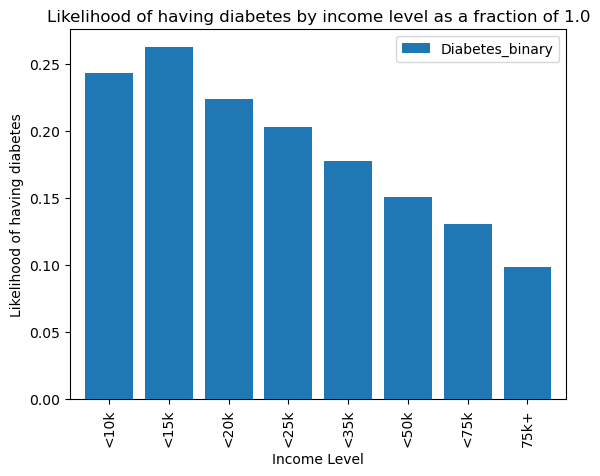

In [82]:
#plotting a bar chart showing how likely survey applicants were to list as Diabetic, based on income range
pd_bar = df_2.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Income Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Likelihood of having diabetes by income level as a fraction of 1.0")


Text(0, 0.5, 'Income Level')

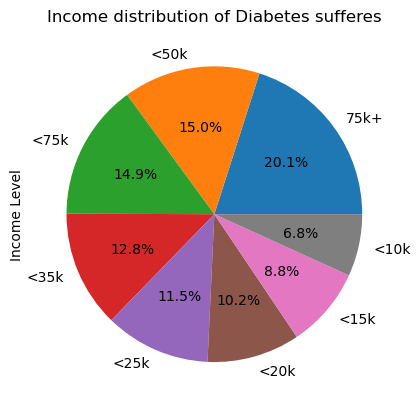

In [80]:
#The above bar chart seems to indicate that generally, the lower the income level, the more likely someone was to be diabetic
#To further explore this relationship, I will take only the respondents that are diabetic, and put this into a pie chart to see how these
#diabetic respondents are distributed according to income ranges 

diabetes_yes_df = diabetes_income.loc[diabetes_income["Diabetes_binary"] == 1.0] 

diabetes_distribution = diabetes_yes_df['Income'].value_counts()

pd_pie = diabetes_distribution.plot(kind='pie', autopct='%1.1f%%', title='Income distribution of Diabetes sufferes')
pd_pie.set_ylabel("Income Level")


In [16]:
#Pie chart gives us a clearer indication- considering the vast majority of Diabetes sufferers were from the higher income brackets

#Performing ANOVA test to see if results are statistically significant
sample_df = diabetes_income.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

groupa = sample_df[sample_df["Income"] == "<10k"]["Diabetes_binary"]
groupb = sample_df[sample_df["Income"] == "<15k"]["Diabetes_binary"]
groupc = sample_df[sample_df["Income"] == "<20k"]["Diabetes_binary"]
groupd = sample_df[sample_df["Income"] == "<25k"]["Diabetes_binary"]
groupe = sample_df[sample_df["Income"] == "<35k"]["Diabetes_binary"]
groupf = sample_df[sample_df["Income"] == "<50k"]["Diabetes_binary"]
groupg = sample_df[sample_df["Income"] == "<75k"]["Diabetes_binary"]
grouph = sample_df[sample_df["Income"] == "75k+"]["Diabetes_binary"]

#'<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+'

In [17]:

st.f_oneway(groupa, groupb, groupc, groupd, groupe, groupf, groupg, grouph)
#result shows some statistical significance

F_onewayResult(statistic=69.84341093945581, pvalue=2.410019344245578e-100)

In [18]:
#Now looking at the relationship between Diabetes and Education
df_3 = diabetes_df[["Diabetes_binary", "Education"]]
df_3.head()

,Diabetes_binary,Education
0,0.0,4.0
1,0.0,6.0
2,0.0,4.0
3,0.0,3.0
4,0.0,5.0


In [50]:
#set range for education
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0]
#name the ranges
group_names=['No School','Elementary School','Some High School','High School Graduate', 'Some College or Technical Scl', 'College Graduate']
#rename values of education column
df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)

df_3.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_12696\1661365455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)


,Diabetes_binary,Education
0,0.0,High School Graduate
1,0.0,College Graduate
2,0.0,High School Graduate
3,0.0,Some High School
4,0.0,Some College or Technical Scl
5,0.0,College Graduate
6,0.0,College Graduate
7,0.0,High School Graduate
8,1.0,Some College or Technical Scl
9,0.0,High School Graduate


In [19]:
#finding the average answer to 'Diabetes_binary' based on education level
education_diabetes = df_3.groupby("Education").mean()
education_diabetes

,Diabetes_binary
Education,
1.0,0.270115
2.0,0.292822
3.0,0.242527
4.0,0.180486
5.0,0.155183
6.0,0.115931


Text(0.5, 1.0, 'Likelihood of having diabetes by education level as a fraction of 1.0')

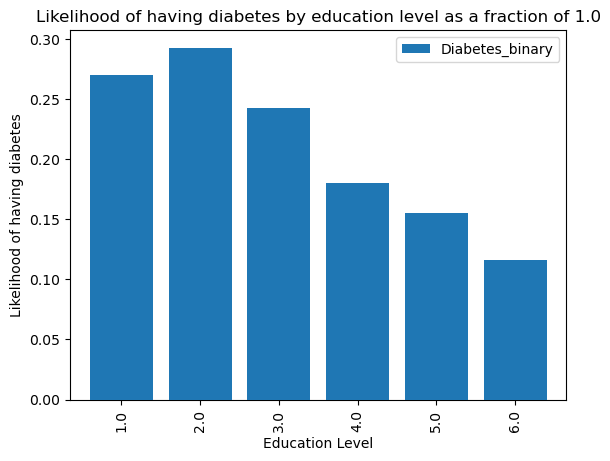

In [84]:
#plotting the relationship between Education level and the likelihood that population surveyed had Diabetes
pd_bar = education_diabetes.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Education Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Likelihood of having diabetes by education level as a fraction of 1.0")


Text(0, 1, 'Education Level')

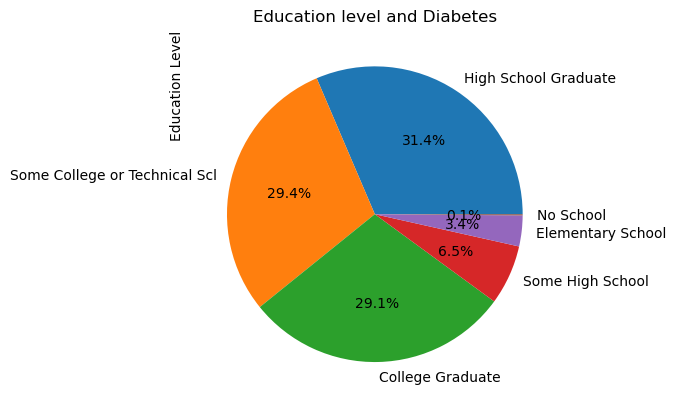

In [76]:
#To analyze this relationship in a clearer way, plotting distribution along education level of those who answwered 'yes' to diabetes
diabetes_yes = df_3.loc[df_3["Diabetes_binary"] == 1.0] 

diabetes_dist = diabetes_yes['Education'].value_counts()

pd_pie = diabetes_dist.plot(kind='pie', autopct='%1.1f%%', title='Education level and Diabetes')
pd_pie.set_ylabel("Education Level", loc='top')

In [53]:
#conducting ANOVA test to see how statistically significant the results are 
s_df = df_3.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)


group0 = s_df[s_df["Education"] == "No School"]["Diabetes_binary"]
group1 = s_df[s_df["Education"] == "Elementary School"]["Diabetes_binary"]
group2 = s_df[s_df["Education"] == "Some High School"]["Diabetes_binary"]
group3 = s_df[s_df["Education"] == "High School Graduate"]["Diabetes_binary"]
group4 = s_df[s_df["Education"] == "Some College or Technical Scl"]["Diabetes_binary"]
group5 = s_df[s_df["Education"] == "College Graduate"]["Diabetes_binary"]

In [54]:

st.f_oneway(group0, group1, group2, group3, group4, group5)
#Result shows statistical significance

F_onewayResult(statistic=51.58590697160028, pvalue=2.2066296246306413e-53)

In [24]:
#now seeing the relationship between Diabetes and daily consumption of Fruits and Veggies
fruits_veg_df = diabetes_df[["Diabetes_binary", "Fruits", "Veggies"]]
fruits_veg_df

,Diabetes_binary,Fruits,Veggies
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
253675,0.0,1.0,1.0
253676,1.0,0.0,0.0
253677,0.0,1.0,0.0
253678,0.0,1.0,1.0


In [29]:
#making another column for the overall score of whether someone eats both daily fruits and veggies
fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]
fruits_veg_df

C:\Users\rohan\AppData\Local\Temp\ipykernel_12696\3592346126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits_veg_df['Diet rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]


,Diabetes_binary,Fruits,Veggies,Diet rating
0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,2.0
...,...,...,...,...
253675,0.0,1.0,1.0,2.0
253676,1.0,0.0,0.0,0.0
253677,0.0,1.0,0.0,1.0
253678,0.0,1.0,1.0,2.0


Text(0, 1, 'Health rating')

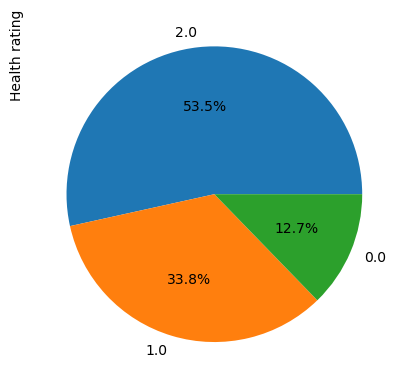

In [26]:
#plotting how much of the population eats fruits and veg daily, the percentage that eats one of those two daily, and the percentage 
#that eats none daily
health_value = fruits_veg_df["Diet rating"].value_counts()
pd_pie = health_value.plot(kind='pie', autopct='%1.1f%%')
pd_pie.set_ylabel("Health rating", loc='top')

In [30]:
#we are looking at the diabetes rate of the respondents who ate both fruit and vegetables, verses those who ate neither.
new_df = fruits_veg_df.loc[fruits_veg_df["Diet rating"] != 1.0]
new_df2 = new_df[["Diabetes_binary", "Diet rating"]]
new_df2



,Diabetes_binary,Diet rating
1,0.0,0.0
3,0.0,2.0
4,0.0,2.0
5,0.0,2.0
6,0.0,0.0
...,...,...
253672,0.0,2.0
253673,0.0,2.0
253675,0.0,2.0
253676,1.0,0.0


In [31]:
#making another column where those who eat no daily fruits and veggies have a 'poor' diet rating, those who eat both daily have a 'Good'
#diet rating
new_df2['Diet rating'] = new_df['Diet rating'].map({0.0:'Poor', 2.0:'Good'}) 
new_df2

C:\Users\rohan\AppData\Local\Temp\ipykernel_12696\2708121283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Diet rating'] = new_df['Diet rating'].map({0.0:'Poor', 2.0:'Good'})


,Diabetes_binary,Diet rating
1,0.0,Poor
3,0.0,Good
4,0.0,Good
5,0.0,Good
6,0.0,Poor
...,...,...
253672,0.0,Good
253673,0.0,Good
253675,0.0,Good
253676,1.0,Poor


In [32]:
#finding the likelihood that someone answered as Diabetic based on whether their diet is 'poor' or 'good'
diet_mean = new_df2.groupby("Diet rating").mean()
diet_mean

,Diabetes_binary
Diet rating,
Good,0.139968
Poor,0.180266


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by diet habits')

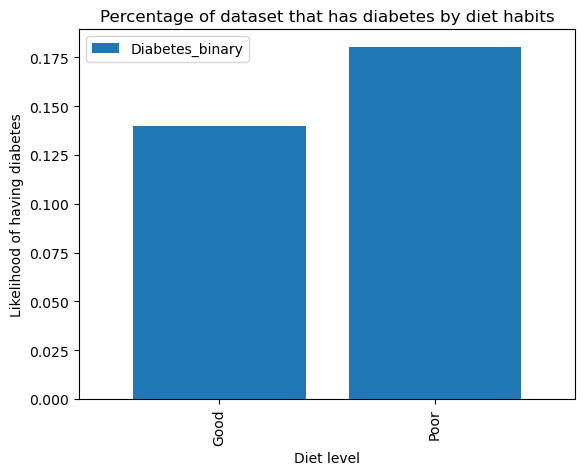

In [33]:
#plotting this relationship between daily fruits/veg consumption and having diabetes
pd_bar = diet_mean.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Diet level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by diet habits")

In [35]:
samp_df = new_df2.sample(frac=0.1, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
option1 = samp_df[samp_df["Diet rating"] == "Good"]["Diabetes_binary"]
option2 = samp_df[samp_df["Diet rating"] == "Poor"]["Diabetes_binary"]

st.ttest_ind(option1, option2, equal_var=False)

#ttest shows statistical significance

Ttest_indResult(statistic=-5.077823932088628, pvalue=3.9860599334935775e-07)

In [59]:
#now looking at the relationship between diabetes and the other health issues listed in the survey
health_issues_df = diabetes_df[["Diabetes_binary", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", ]]
health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]
health_issues_df

C:\Users\rohan\AppData\Local\Temp\ipykernel_12696\3036860610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_issues_df["Health Problem Level"] = health_issues_df["HighBP"] + health_issues_df["HighChol"] + health_issues_df["Stroke"] + health_issues_df["HeartDiseaseorAttack"]


,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,2.0
253676,1.0,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0,0.0
253678,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
#seeing the amount of people who had one or more of the other health issues, based on whether they are Diabetic or not
health_issues_df.groupby("Diabetes_binary")["Health Problem Level"].value_counts()

Diabetes_binary  Health Problem Level
0.0              0.0                     78475
                 1.0                     65384
                 2.0                     39665
                 3.0                      9549
                 4.0                      1304
1.0              2.0                     14953
                 1.0                      9832
                 3.0                      5525
                 0.0                      3609
                 4.0                      1178
Name: Health Problem Level, dtype: int64

In [61]:

yes_diabetes = health_issues_df[health_issues_df["Diabetes_binary"] == 1.0]
yes_diabetes

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
8,1.0,1.0,1.0,0.0,1.0,3.0
10,1.0,0.0,0.0,0.0,0.0,0.0
13,1.0,1.0,1.0,0.0,0.0,2.0
17,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
253659,1.0,0.0,1.0,0.0,0.0,1.0
253668,1.0,0.0,1.0,0.0,1.0,2.0
253670,1.0,1.0,1.0,0.0,1.0,3.0
253676,1.0,1.0,1.0,0.0,0.0,2.0


Text(0, 1, 'Health Problem Rating')

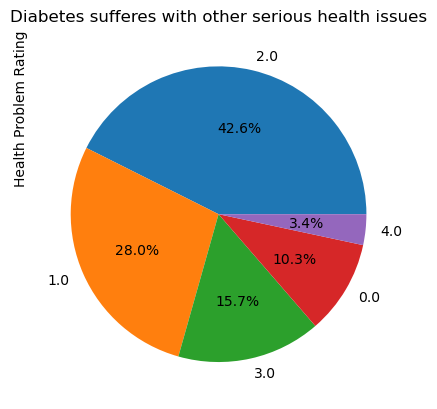

In [78]:
#Pie chart of those with diabetes- what percentage of them had 0, 1, 2, 3 or 4 other serious health conditions
yes_diabetes1 = yes_diabetes["Health Problem Level"].value_counts()
pd_pie = yes_diabetes1.plot(kind='pie', autopct='%1.1f%%', title='Diabetes sufferes with other serious health issues')
pd_pie.set_ylabel("Health Problem Rating", loc='top')

In [63]:
no_diabetes = health_issues_df[health_issues_df["Diabetes_binary"] == 0.0]
no_diabetes

,Diabetes_binary,HighBP,HighChol,Stroke,HeartDiseaseorAttack,Health Problem Level
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
253673,0.0,1.0,0.0,0.0,0.0,1.0
253674,0.0,0.0,0.0,0.0,0.0,0.0
253675,0.0,1.0,1.0,0.0,0.0,2.0
253677,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 1, 'Health Problem Rating')

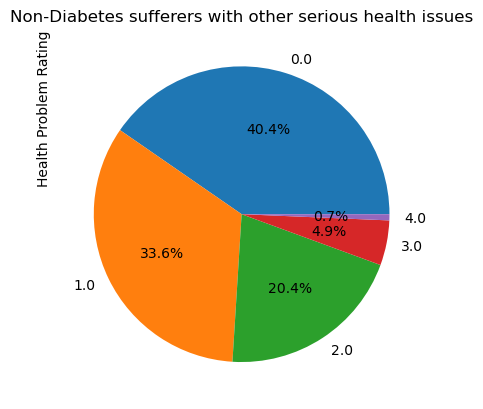

In [79]:
#Pie chart of those without diabetes- what percentage of them had 0, 1, 2, 3 or 4 other serious health conditions
no_diabetes1 = no_diabetes["Health Problem Level"].value_counts()
pd_pie = no_diabetes1.plot(kind='pie', autopct='%1.1f%%', title='Non-Diabetes sufferers with other serious health issues')
pd_pie.set_ylabel("Health Problem Rating", loc='top')

In [ ]:
#result shows that those with diabetes are much more likely to have more serious health conditions 


In [68]:
sample_df = health_issues_df.sample(frac=0.05, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
yesdiab = sample_df[sample_df["Diabetes_binary"] == 1.0]["Health Problem Level"]
nodiab = sample_df[sample_df["Diabetes_binary"] == 0.0]["Health Problem Level"]

st.ttest_ind(yesdiab, nodiab, equal_var=False)


Ttest_indResult(statistic=33.36519653178169, pvalue=1.8448469497313688e-199)

In [ ]:
#ttest shows statistical significance 